In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chi2, ttest_ind, pointbiserialr
from IPython.display import display
import math

In [2]:
#Description of attributes
#Data Download: http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008
#https://www.hindawi.com/journals/bmri/2014/781670/

In [3]:
path = 'Data/'
df = pd.read_csv(path + 'diabetic_data.csv')

In [4]:
df.shape

(101766, 50)

In [5]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


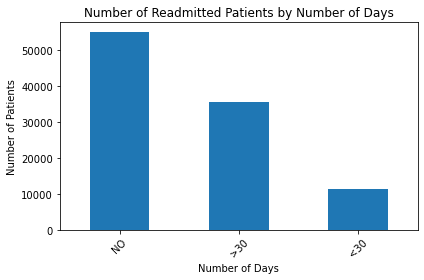

In [8]:
df['readmitted'].value_counts().plot(kind='bar')
plt.title('Number of Readmitted Patients by Number of Days')
plt.ylabel('Number of Patients')
plt.xlabel('Number of Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Figures/unbalanced_bargraph.png')

In [10]:
#Rebalance target variable
YES = ['>30','<30']
df['readmitted'] = df['readmitted'].replace(YES, 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

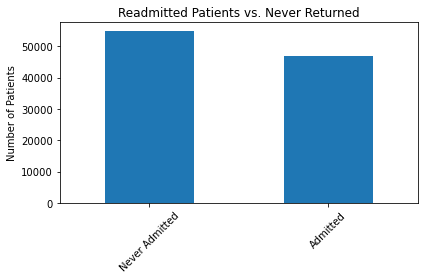

In [11]:
df['readmitted'].value_counts().plot(kind='bar')
plt.title('Readmitted Patients vs. Never Returned')
plt.xticks(ticks=[0,1],labels=['Never Admitted','Admitted'],rotation=45)
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.savefig('Figures/balanced_bargraph.png')

In [12]:
#Count number of missing values
for col in df.columns:
    count = df[col][df[col] == '?'].count()
    print(col,count, '|',str(round(count/len(df[col]) * 100))+'%')
#Gender needs to be counted separately because its null value is not "?"
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count(), '|', str(round(df['gender'][df['gender'] == 'Unknown/Invalid'].count()/len(df[col]) * 100))+'%')

C:\Users\Donghyeok\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


encounter_id 0 | 0%
patient_nbr 0 | 0%
race 2273 | 2%
gender 0 | 0%
age 0 | 0%
weight 98569 | 97%
admission_type_id 0 | 0%
discharge_disposition_id 0 | 0%
admission_source_id 0 | 0%
time_in_hospital 0 | 0%
payer_code 40256 | 40%
medical_specialty 49949 | 49%
num_lab_procedures 0 | 0%
num_procedures 0 | 0%
num_medications 0 | 0%
number_outpatient 0 | 0%
number_emergency 0 | 0%
number_inpatient 0 | 0%
diag_1 21 | 0%
diag_2 358 | 0%
diag_3 1423 | 1%
number_diagnoses 0 | 0%
max_glu_serum 0 | 0%
A1Cresult 0 | 0%
metformin 0 | 0%
repaglinide 0 | 0%
nateglinide 0 | 0%
chlorpropamide 0 | 0%
glimepiride 0 | 0%
acetohexamide 0 | 0%
glipizide 0 | 0%
glyburide 0 | 0%
tolbutamide 0 | 0%
pioglitazone 0 | 0%
rosiglitazone 0 | 0%
acarbose 0 | 0%
miglitol 0 | 0%
troglitazone 0 | 0%
tolazamide 0 | 0%
examide 0 | 0%
citoglipton 0 | 0%
insulin 0 | 0%
glyburide-metformin 0 | 0%
glipizide-metformin 0 | 0%
glimepiride-pioglitazone 0 | 0%
metformin-rosiglitazone 0 | 0%
metformin-pioglitazone 0 | 0%
change 0 |

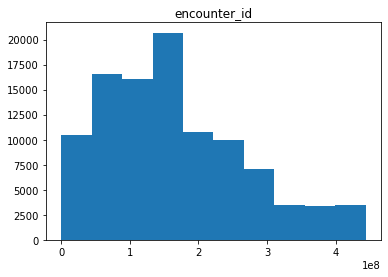

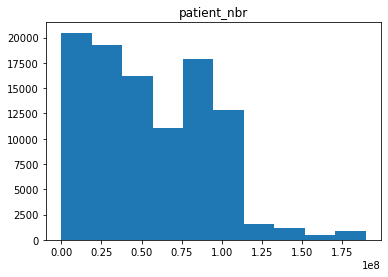

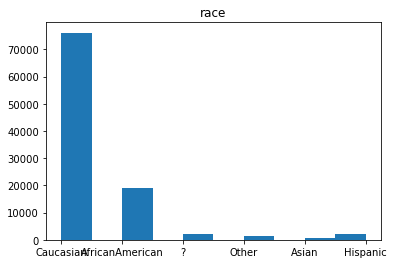

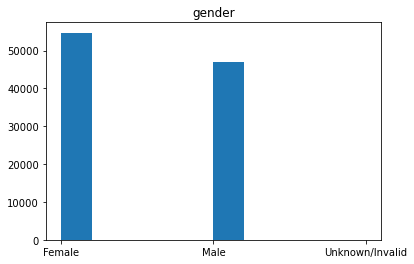

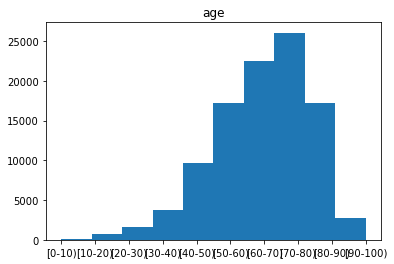

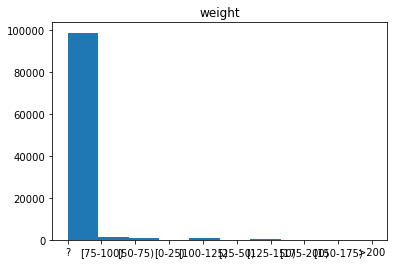

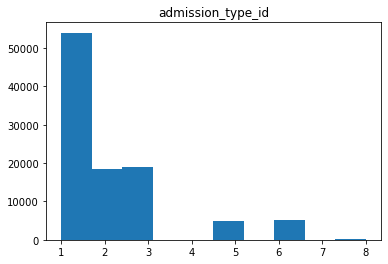

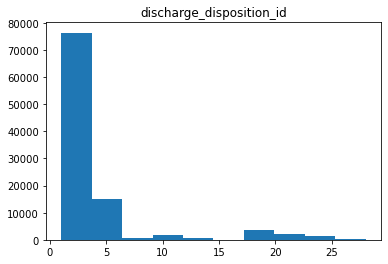

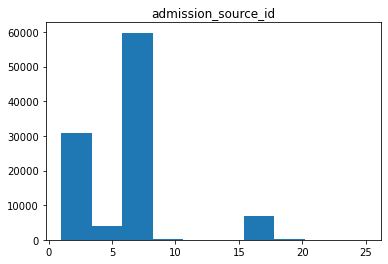

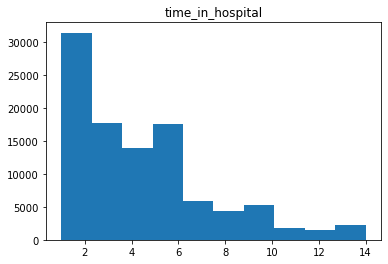

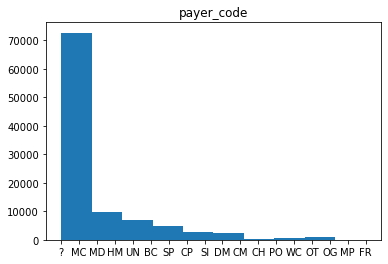

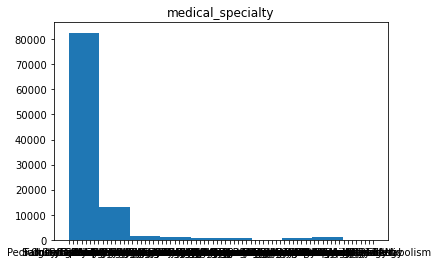

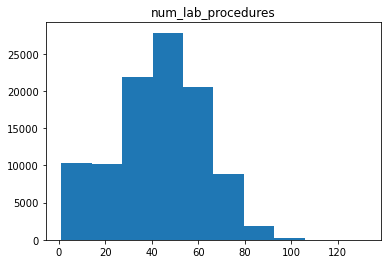

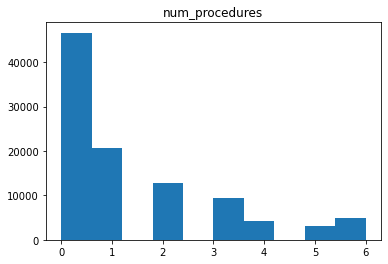

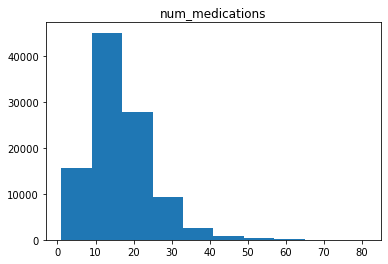

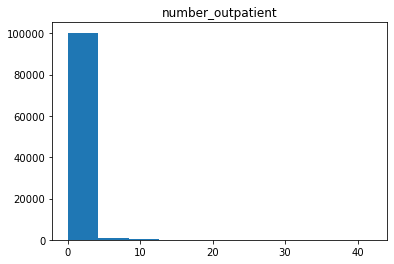

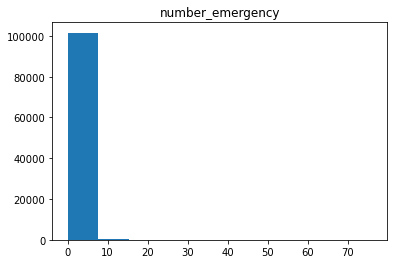

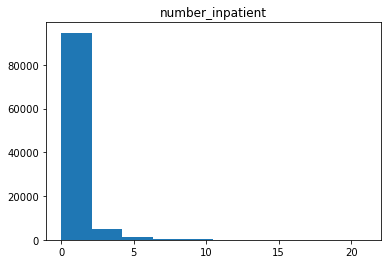

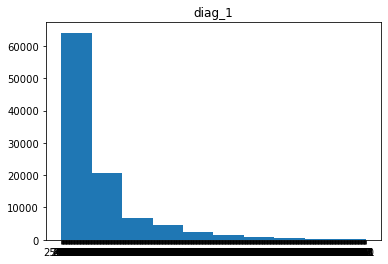

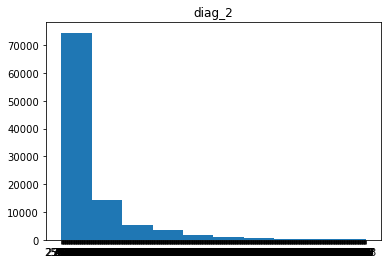

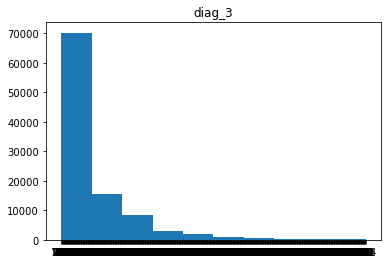

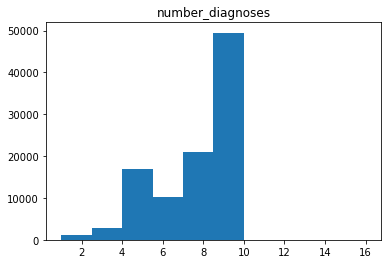

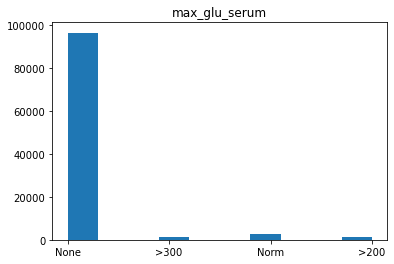

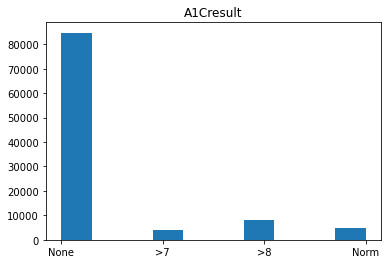

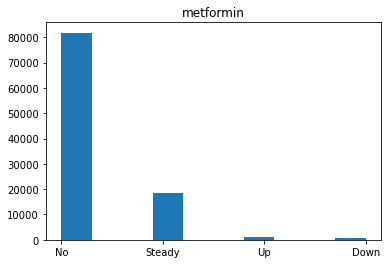

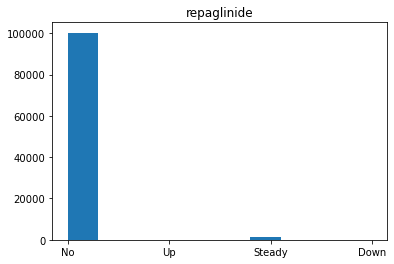

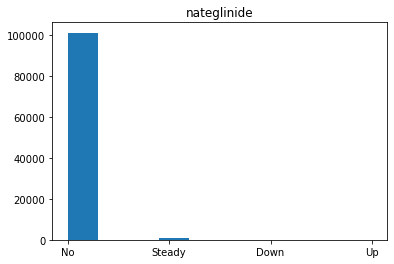

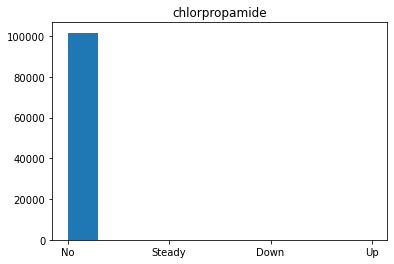

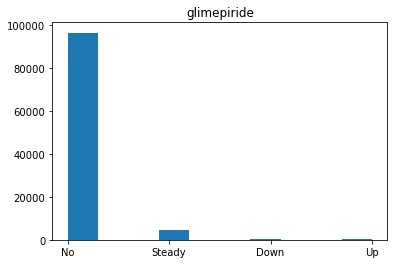

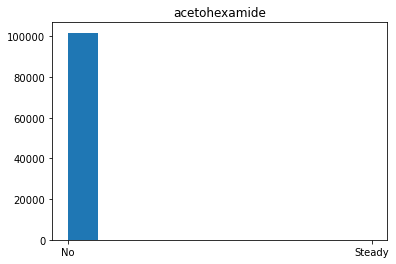

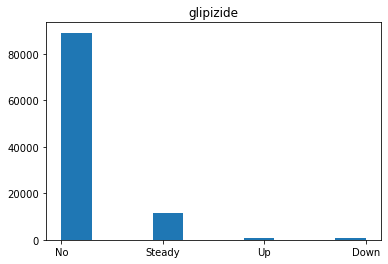

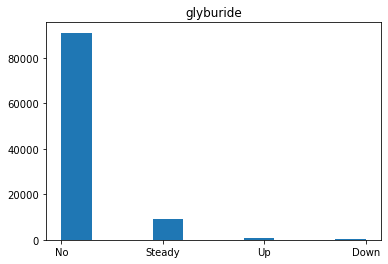

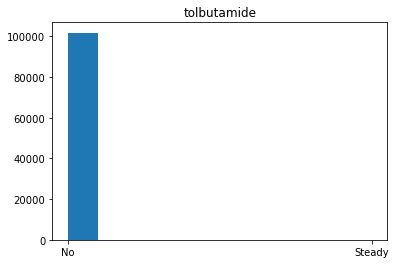

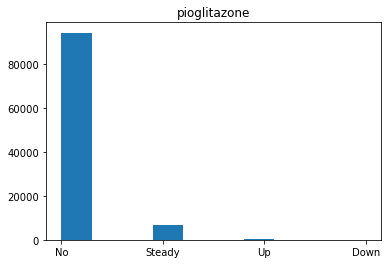

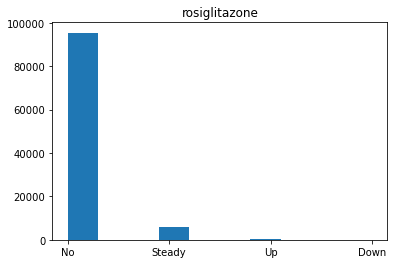

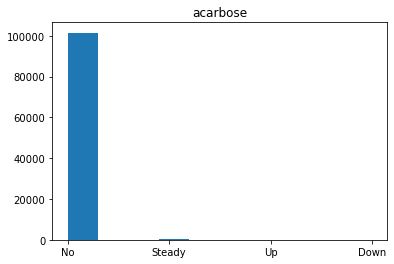

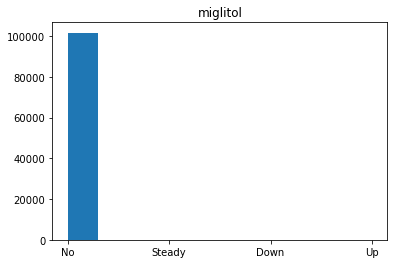

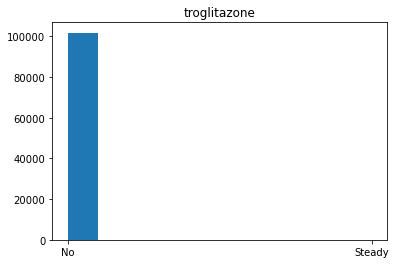

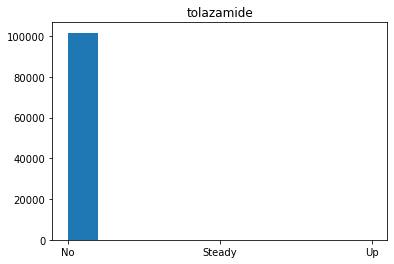

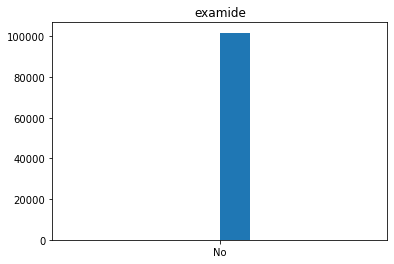

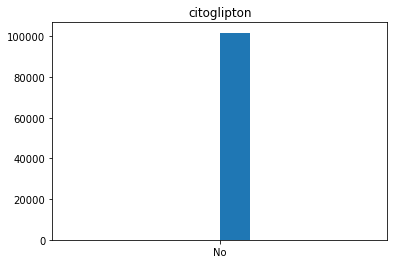

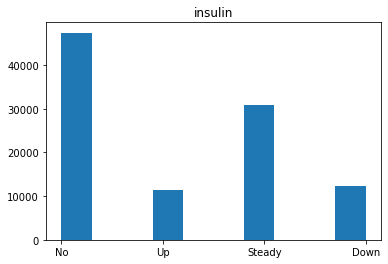

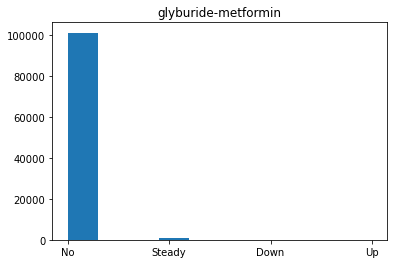

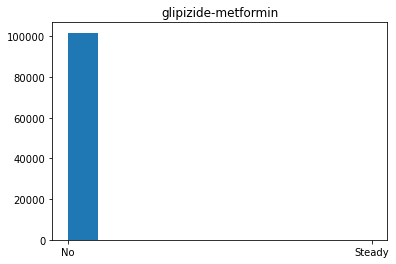

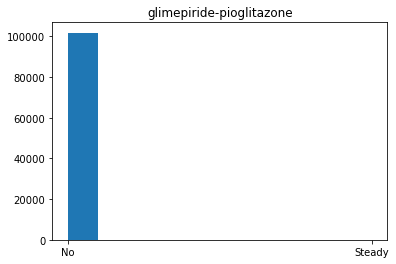

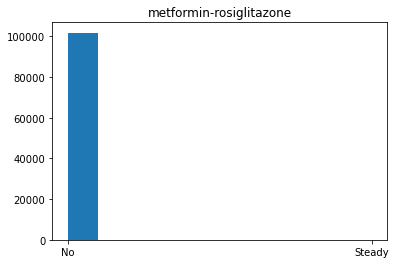

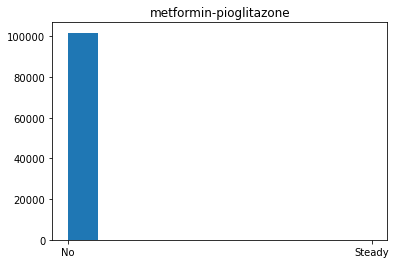

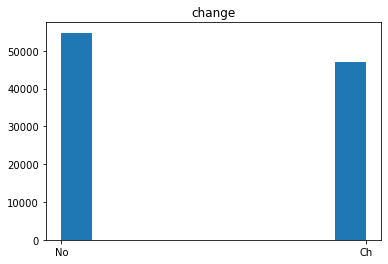

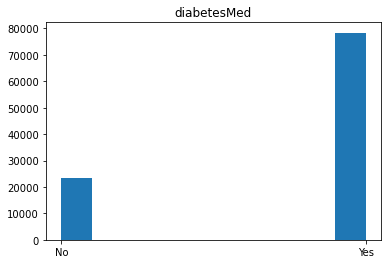

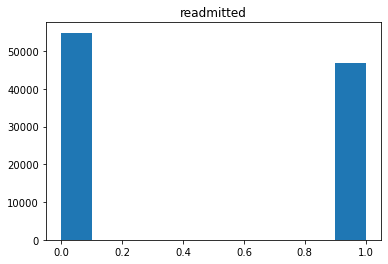

In [13]:
for x in df.columns:
    if x == 'categorical':
        plt.bar(df[x])
    else:
        plt.hist(df[x])
    plt.title(x)
    plt.show()

In [14]:
#These variables only have one value
df.drop(['examide','metformin-rosiglitazone','citoglipton'], axis=1, inplace=True)

#Drop columns with missing values & unnecessary information
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

#Drop those with missing gender and race
df = df[df['gender'] != 'Unknown/Invalid']
df = df[df['race'] != '?']

In [15]:
#Change age into median values
age_dict = {
    '[0-10)': 5,
    '[10-20)': 15, 
    '[20-30)': 25, 
    '[30-40)': 35, 
    '[40-50)': 45, 
    '[50-60)': 55, 
    '[60-70)': 65, 
    '[70-80)': 75, 
    '[80-90)': 85, 
    '[90-100)': 95 
}
df['Age'] = df['age'].map(age_dict)
df.drop('age', axis=1, inplace=True)

# Encode the non-numeric values
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

#Ordinal Encoding (Explain in data-wrangling section of the report!!)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 2)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)

df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 2)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

df['hospital_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
df['service_usage'] = df['num_procedures'] + df['num_medications'] + df['num_lab_procedures']

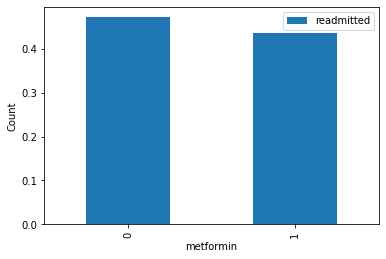

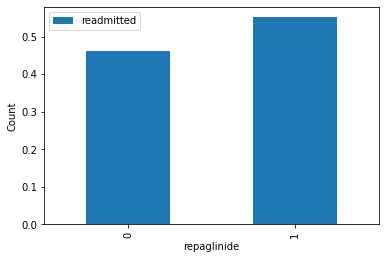

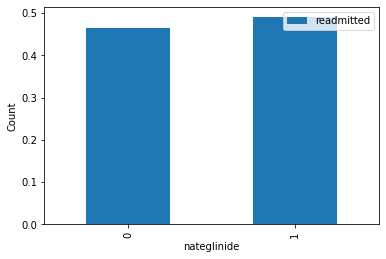

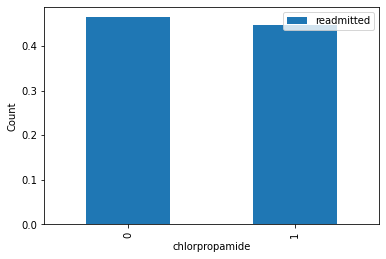

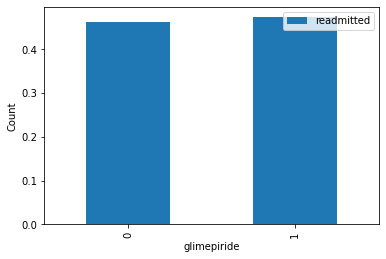

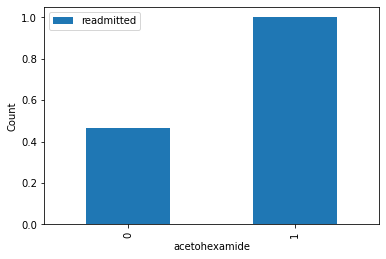

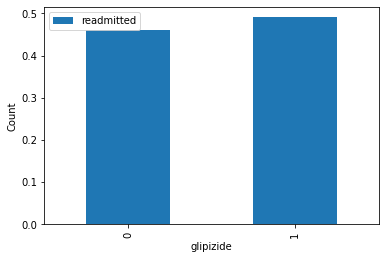

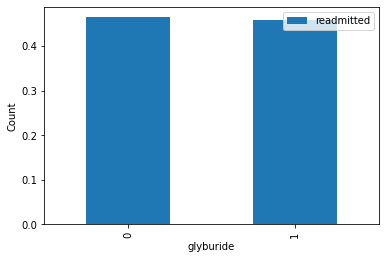

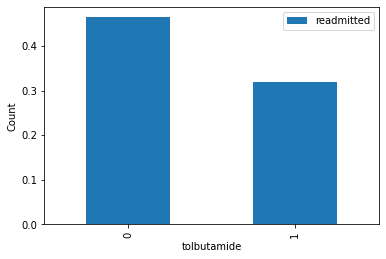

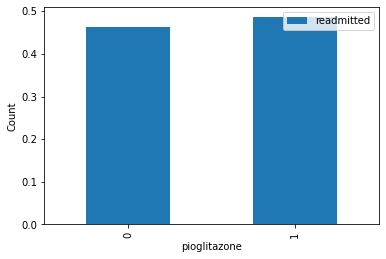

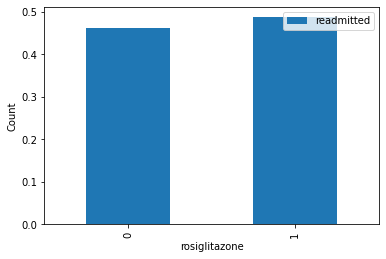

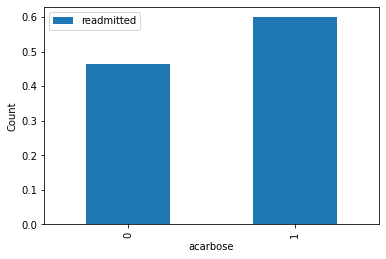

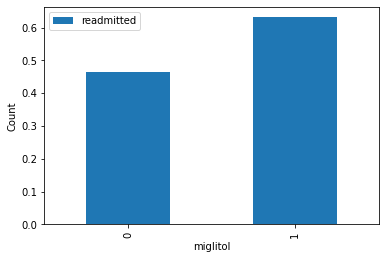

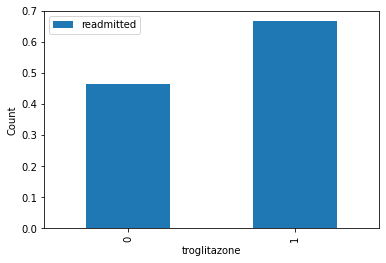

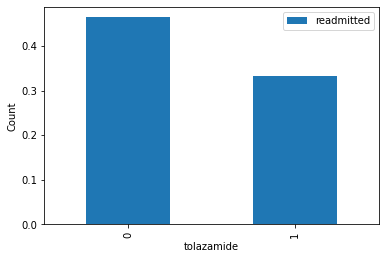

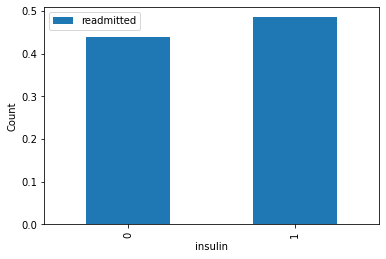

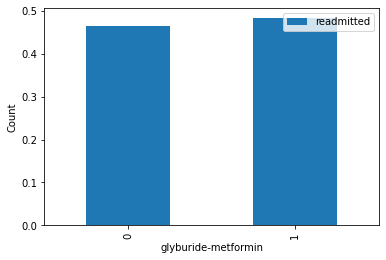

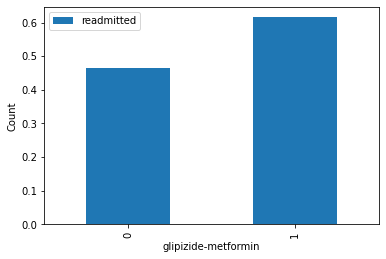

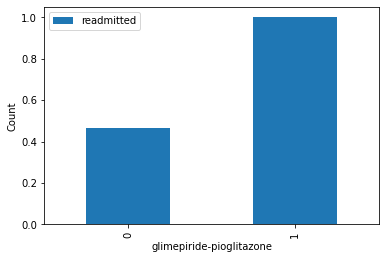

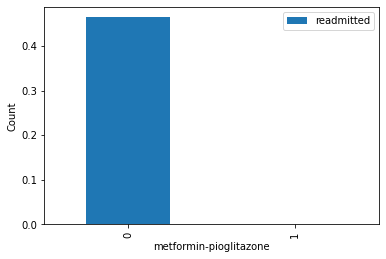

In [16]:
medicines = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
             'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
             'miglitol', 'troglitazone', 'tolazamide', 'insulin',
             'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
             'metformin-pioglitazone']

#Drug being given vs. Drug not being given
#Simplifies dataframe, but does not lose any information
for x in medicines:
     df[x] = df[x].replace('No', 0)
     df[x] = df[x].replace('Steady', 1)
     df[x] = df[x].replace('Up', 1)
     df[x] = df[x].replace('Down', 1)
    
#Group by target variable to look at ratio
for x in medicines:
     df.groupby([x])[['readmitted']].mean().plot(kind='bar').set_ylabel('Count')
     df.groupby([x])[['readmitted']].mean()

In [17]:
#Group up codes based on ICD9 coding: https://www.cdc.gov/nchs/data/icd/icd9cm_guidelines_2011.pdf

# Codes containing V: Health Services that don't require diagnosis
# Codes containing E: Environmental cause of health problem (injury/poison)
# Codes containing ?: No documentation
df['diag_1'] = df['diag_1'].replace('?', 0)
df.loc[df['diag_1'].str.contains('V', na=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E', na=False), 'diag_1'] = 0
df['diag_2'] = df['diag_2'].replace('?', 0)
df.loc[df['diag_2'].str.contains('V', na=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E', na=False), 'diag_2'] = 0
df['diag_3'] = df['diag_3'].replace('?', 0)
df.loc[df['diag_3'].str.contains('V', na=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E', na=False), 'diag_3'] = 0


In [18]:
df['diag_1'] = df['diag_1'].astype(float)
df['diag_2'] = df['diag_2'].astype(float)
df['diag_3'] = df['diag_3'].astype(float)

In [19]:
# A: Infectious & Parasitic Diseases
# B: Neoplasms
# C: Endocrine, Metabolic Diseases
# D: Blood Diseases
# E: Mental Disorders
# F: Nervous System and Sense Diseases
# G: Circulatory Disesases
# H: Respiratory Diseases
# I: Digestive Diseases
# J: Genitourinary Diseases
# K: Pregnancy Complications
# L: Skin Diseases
# M: Musculoskeletal Diseases
# N: Congenital Anomalies
# O: Newborn Guidelines
# P: Signs and Symptoms 
# Q: Injury and Poisoning

df.loc[(df['diag_1'] > 0 ) & (df['diag_1'] <= 139), 'diag_1'] = 1
df.loc[(df['diag_1'] > 139 ) & (df['diag_1'] <= 239), 'diag_1'] = 2
df.loc[(df['diag_1'] > 239 ) & (df['diag_1'] <= 279), 'diag_1'] = 3
df.loc[(df['diag_1'] > 279 ) & (df['diag_1'] <= 289), 'diag_1'] = 4
df.loc[(df['diag_1'] > 289 ) & (df['diag_1'] <= 319), 'diag_1'] = 5
df.loc[(df['diag_1'] > 319 ) & (df['diag_1'] <= 389), 'diag_1'] = 6
df.loc[(df['diag_1'] > 389 ) & (df['diag_1'] <= 459), 'diag_1'] = 7
df.loc[(df['diag_1'] > 459 ) & (df['diag_1'] <= 519), 'diag_1'] = 8
df.loc[(df['diag_1'] > 519 ) & (df['diag_1'] <= 579), 'diag_1'] = 9
df.loc[(df['diag_1'] > 579 ) & (df['diag_1'] <= 629), 'diag_1'] = 10
df.loc[(df['diag_1'] > 629 ) & (df['diag_1'] <= 679), 'diag_1'] = 11
df.loc[(df['diag_1'] > 679 ) & (df['diag_1'] <= 709), 'diag_1'] = 12
df.loc[(df['diag_1'] > 709 ) & (df['diag_1'] <= 739), 'diag_1'] = 13
df.loc[(df['diag_1'] > 739 ) & (df['diag_1'] <= 759), 'diag_1'] = 14
df.loc[(df['diag_1'] > 759 ) & (df['diag_1'] <= 779), 'diag_1'] = 15
df.loc[(df['diag_1'] > 779 ) & (df['diag_1'] <= 799), 'diag_1'] = 16
df.loc[(df['diag_1'] > 799 ) & (df['diag_1'] <= 999), 'diag_1'] = 17

df['diag_1'] = df['diag_1'].replace(1, 'A')
df['diag_1'] = df['diag_1'].replace(2, 'B')
df['diag_1'] = df['diag_1'].replace(3, 'C')
df['diag_1'] = df['diag_1'].replace(4, 'D')
df['diag_1'] = df['diag_1'].replace(5, 'E')
df['diag_1'] = df['diag_1'].replace(6, 'F')
df['diag_1'] = df['diag_1'].replace(7, 'G')
df['diag_1'] = df['diag_1'].replace(8, 'H')
df['diag_1'] = df['diag_1'].replace(9, 'I')
df['diag_1'] = df['diag_1'].replace(10, 'J')
df['diag_1'] = df['diag_1'].replace(11, 'K')
df['diag_1'] = df['diag_1'].replace(12, 'L')
df['diag_1'] = df['diag_1'].replace(13, 'M')
df['diag_1'] = df['diag_1'].replace(14, 'N')
df['diag_1'] = df['diag_1'].replace(15, 'O')
df['diag_1'] = df['diag_1'].replace(16, 'P')
df['diag_1'] = df['diag_1'].replace(17, 'Q')

In [20]:
df.loc[(df['diag_2'] > 0 ) & (df['diag_2'] <= 139), 'diag_2'] = 1
df.loc[(df['diag_2'] > 139 ) & (df['diag_2'] <= 239), 'diag_2'] = 2
df.loc[(df['diag_2'] > 239 ) & (df['diag_2'] <= 279), 'diag_2'] = 3
df.loc[(df['diag_2'] > 279 ) & (df['diag_2'] <= 289), 'diag_2'] = 4
df.loc[(df['diag_2'] > 289 ) & (df['diag_2'] <= 319), 'diag_2'] = 5
df.loc[(df['diag_2'] > 319 ) & (df['diag_2'] <= 389), 'diag_2'] = 6
df.loc[(df['diag_2'] > 389 ) & (df['diag_2'] <= 459), 'diag_2'] = 7
df.loc[(df['diag_2'] > 459 ) & (df['diag_2'] <= 519), 'diag_2'] = 8
df.loc[(df['diag_2'] > 519 ) & (df['diag_2'] <= 579), 'diag_2'] = 9
df.loc[(df['diag_2'] > 579 ) & (df['diag_2'] <= 629), 'diag_2'] = 10
df.loc[(df['diag_2'] > 629 ) & (df['diag_2'] <= 679), 'diag_2'] = 11
df.loc[(df['diag_2'] > 679 ) & (df['diag_2'] <= 709), 'diag_2'] = 12
df.loc[(df['diag_2'] > 709 ) & (df['diag_2'] <= 739), 'diag_2'] = 13
df.loc[(df['diag_2'] > 739 ) & (df['diag_2'] <= 759), 'diag_2'] = 14
df.loc[(df['diag_2'] > 759 ) & (df['diag_2'] <= 779), 'diag_2'] = 15
df.loc[(df['diag_2'] > 779 ) & (df['diag_2'] <= 799), 'diag_2'] = 16
df.loc[(df['diag_2'] > 799 ) & (df['diag_2'] <= 999), 'diag_2'] = 17

df['diag_2'] = df['diag_2'].replace(1, 'A')
df['diag_2'] = df['diag_2'].replace(2, 'B')
df['diag_2'] = df['diag_2'].replace(3, 'C')
df['diag_2'] = df['diag_2'].replace(4, 'D')
df['diag_2'] = df['diag_2'].replace(5, 'E')
df['diag_2'] = df['diag_2'].replace(6, 'F')
df['diag_2'] = df['diag_2'].replace(7, 'G')
df['diag_2'] = df['diag_2'].replace(8, 'H')
df['diag_2'] = df['diag_2'].replace(9, 'I')
df['diag_2'] = df['diag_2'].replace(10, 'J')
df['diag_2'] = df['diag_2'].replace(11, 'K')
df['diag_2'] = df['diag_2'].replace(12, 'L')
df['diag_2'] = df['diag_2'].replace(13, 'M')
df['diag_2'] = df['diag_2'].replace(14, 'N')
df['diag_2'] = df['diag_2'].replace(15, 'O')
df['diag_2'] = df['diag_2'].replace(16, 'P')
df['diag_2'] = df['diag_2'].replace(17, 'Q')

In [21]:
df.loc[(df['diag_3'] > 0 ) & (df['diag_3'] <= 139), 'diag_3'] = 1
df.loc[(df['diag_3'] > 139 ) & (df['diag_3'] <= 239), 'diag_3'] = 2
df.loc[(df['diag_3'] > 239 ) & (df['diag_3'] <= 279), 'diag_3'] = 3
df.loc[(df['diag_3'] > 279 ) & (df['diag_3'] <= 289), 'diag_3'] = 4
df.loc[(df['diag_3'] > 289 ) & (df['diag_3'] <= 319), 'diag_3'] = 5
df.loc[(df['diag_3'] > 319 ) & (df['diag_3'] <= 389), 'diag_3'] = 6
df.loc[(df['diag_3'] > 389 ) & (df['diag_3'] <= 459), 'diag_3'] = 7
df.loc[(df['diag_3'] > 459 ) & (df['diag_3'] <= 519), 'diag_3'] = 8
df.loc[(df['diag_3'] > 519 ) & (df['diag_3'] <= 579), 'diag_3'] = 9
df.loc[(df['diag_3'] > 579 ) & (df['diag_3'] <= 629), 'diag_3'] = 10
df.loc[(df['diag_3'] > 629 ) & (df['diag_3'] <= 679), 'diag_3'] = 11
df.loc[(df['diag_3'] > 679 ) & (df['diag_3'] <= 709), 'diag_3'] = 12
df.loc[(df['diag_3'] > 709 ) & (df['diag_3'] <= 739), 'diag_3'] = 13
df.loc[(df['diag_3'] > 739 ) & (df['diag_3'] <= 759), 'diag_3'] = 14
df.loc[(df['diag_3'] > 759 ) & (df['diag_3'] <= 779), 'diag_3'] = 15
df.loc[(df['diag_3'] > 779 ) & (df['diag_3'] <= 799), 'diag_3'] = 16
df.loc[(df['diag_3'] > 799 ) & (df['diag_3'] <= 999), 'diag_3'] = 17

df['diag_3'] = df['diag_3'].replace(1, 'A')
df['diag_3'] = df['diag_3'].replace(2, 'B')
df['diag_3'] = df['diag_3'].replace(3, 'C')
df['diag_3'] = df['diag_3'].replace(4, 'D')
df['diag_3'] = df['diag_3'].replace(5, 'E')
df['diag_3'] = df['diag_3'].replace(6, 'F')
df['diag_3'] = df['diag_3'].replace(7, 'G')
df['diag_3'] = df['diag_3'].replace(8, 'H')
df['diag_3'] = df['diag_3'].replace(9, 'I')
df['diag_3'] = df['diag_3'].replace(10, 'J')
df['diag_3'] = df['diag_3'].replace(11, 'K')
df['diag_3'] = df['diag_3'].replace(12, 'L')
df['diag_3'] = df['diag_3'].replace(13, 'M')
df['diag_3'] = df['diag_3'].replace(14, 'N')
df['diag_3'] = df['diag_3'].replace(15, 'O')
df['diag_3'] = df['diag_3'].replace(16, 'P')
df['diag_3'] = df['diag_3'].replace(17, 'Q')

In [22]:
mapping = pd.read_csv(path + 'IDs_mapping.csv')
mapping1 = pd.DataFrame(mapping.loc[:8])
mapping2 = pd.DataFrame(mapping.loc[9:39])
mapping3 = pd.DataFrame(mapping.loc[41:])

In [23]:
mapping1.iloc[:8]

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [24]:
mapping2 = mapping2.reset_index().drop('index', axis=1)
mapping2.columns = mapping2.iloc[0]
mapping2.drop(mapping2.index[0])

,discharge_disposition_id,description
1,1,Discharged to home
2,2,Discharged/transferred to another short term h...
3,3,Discharged/transferred to SNF
4,4,Discharged/transferred to ICF
5,5,Discharged/transferred to another type of inpa...
6,6,Discharged/transferred to home with home healt...
7,7,Left AMA
8,8,Discharged/transferred to home under care of H...
9,9,Admitted as an inpatient to this hospital
10,10,Neonate discharged to another hospital for neo...


In [25]:
mapping3.reset_index().drop('index', axis=1)
mapping3.columns = mapping3.iloc[0]
mapping3.drop(mapping3.index[0])

41,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


In [26]:
#Make ID Mappings into fewer categories
#Drop ids for babies, expired, and hospice care patients

to_drop = [4]
df = df[~df['admission_type_id'].isin(to_drop)]

emergency = [1, 2, 7]
elective = [3]
unknown_admin = [5, 6, 8]
df['admission_type_id'] = df['admission_type_id'].replace(emergency, 1)
df['admission_type_id'] = df['admission_type_id'].replace(elective, 2)
df['admission_type_id'] = df['admission_type_id'].replace(unknown_admin, 3)


to_drop = [10, 11, 13, 14, 19, 20, 21]
df = df[~df['discharge_disposition_id'].isin(to_drop)]

home_discharge = [1, 6, 8]
transfer_discharge = [2, 3, 4, 5, 9, 22, 23]
unknown_discharge = [18, 25, 26]
outpatient_discharge = [12, 15, 16, 17]
other_discharge = [7, 24, 27, 28, 29, 30]
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(home_discharge,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(transfer_discharge,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(outpatient_discharge,3)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(unknown_discharge,4)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(other_discharge,5)

to_drop = [11, 12, 13, 14, 19, 23, 24, 26]
df = df[~df['admission_source_id'].isin(to_drop)]
referral = [1, 2, 3]
transfer = [4, 5, 6, 10, 18, 22, 25]
unknown_source = [9, 15, 16, 17, 20, 21]
emergency = [7]
court = [8]
df['admission_source_id'] = df['admission_source_id'].replace(referral,1)
df['admission_source_id'] = df['admission_source_id'].replace(transfer,2)
df['admission_source_id'] = df['admission_source_id'].replace(emergency,3)
df['admission_source_id'] = df['admission_source_id'].replace(court,4)
df['admission_source_id'] = df['admission_source_id'].replace(unknown_source,5)

In [27]:
print(df.shape)
df.head(10)

(97088, 44)


,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Age,hospital_visits,service_usage
0,Caucasian,0,3,4,1,1,41,0,1,0,...,0,0,0,0,0,0,0,5,0,42
1,Caucasian,0,1,1,3,3,59,0,18,0,...,0,0,0,0,1,1,1,15,0,77
2,AfricanAmerican,0,1,1,3,2,11,5,13,2,...,0,0,0,0,0,1,0,25,3,29
3,Caucasian,1,1,1,3,2,44,1,16,0,...,0,0,0,0,1,1,0,35,0,61
4,Caucasian,1,1,1,3,1,51,0,8,0,...,0,0,0,0,1,1,0,45,0,59
5,Caucasian,1,1,1,1,3,31,6,16,0,...,0,0,0,0,0,1,1,55,0,53
6,Caucasian,1,2,1,1,4,70,1,21,0,...,0,0,0,0,1,1,0,65,0,92
7,Caucasian,1,1,1,3,5,73,0,12,0,...,0,0,0,0,0,1,1,75,0,85
8,Caucasian,0,1,1,2,13,68,2,28,0,...,0,0,0,0,1,1,0,85,0,98
9,Caucasian,0,2,2,2,12,33,3,18,0,...,0,0,0,0,1,1,0,95,0,54


In [28]:
att_dtype = {
             'race':'Categorical', 'gender': 'Categorical', 
             'Age':'Ordinal', 'admission_type_id': 'Categorical', 
             'discharge_disposition_id':'Categorical', 
             'admission_source_id': 'Categorical', 
             'time_in_hospital': 'Numerical', 
             'num_lab_procedures': 'Numerical',
             'num_procedures':'Numerical', 'num_medications':'Numerical', 
             'number_outpatient':'Numerical', 'number_emergency':'Numerical', 
             'number_inpatient': 'Numerical', 'diag_1': 'Categorical', 
             'diag_2': 'Categorical', 'diag_3': 'Categorical', 
             'number_diagnoses': 'Numerical', 'max_glu_serum': 'Ordinal', 
             'A1Cresult': 'Ordinal', 'metformin': 'Categorical', 
             'repaglinide': 'Categorical', 'nateglinide': 'Categorical', 
             'chlorpropamide': 'Categorical', 'glimepiride': 'Categorical', 
             'acetohexamide': 'Categorical', 'glipizide': 'Categorical', 
             'glyburide': 'Categorical', 'tolbutamide': 'Categorical',
             'pioglitazone': 'Categorical', 'rosiglitazone': 'Categorical', 
             'acarbose': 'Categorical', 'miglitol': 'Categorical', 
             'troglitazone': 'Categorical', 'tolazamide': 'Categorical', 
             'insulin': 'Categorical','glyburide-metformin': 'Categorical', 
             'glipizide-metformin': 'Categorical', 'glimepiride-pioglitazone': 'Categorical', 
             'metformin-pioglitazone': 'Categorical', 
             'change': 'Categorical', 'diabetesMed': 'Categorical', 
             'hospital_visits': 'Numerical', 'service_usage': 'Numerical'
            }

In [29]:
cont_vars = []
for x in att_dtype:
    if att_dtype[x] == 'Numerical':
        cont_vars.append(x)

In [30]:
nominalcats = []
for x in att_dtype:
    if att_dtype[x] == 'Categorical':
        nominalcats.append(x)

In [31]:
df[nominalcats] = df[nominalcats].apply(lambda x: x.astype("category"))
df[cont_vars] = df[cont_vars].apply(lambda x: x.astype("int"))

In [32]:
df = pd.get_dummies(df, columns=nominalcats, drop_first = True)

In [33]:
corr_matrix = df.corr()
correlation = np.triu(corr_matrix.values, k=1)
corr_matrix = pd.DataFrame(correlation, columns=corr_matrix.columns)
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.65)]

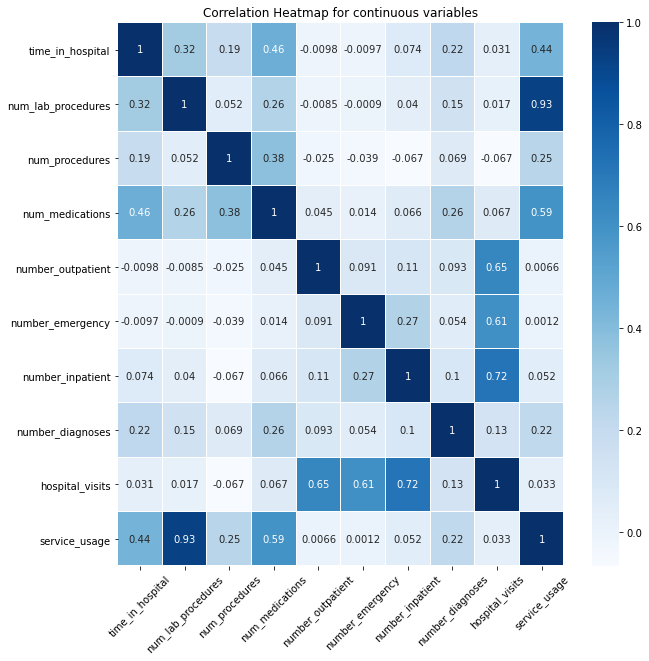

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df[cont_vars].corr(), linewidths=.1, cmap="Blues", annot=True)


plt.title('Correlation Heatmap for continuous variables')
plt.xticks(rotation=45)
plt.savefig('Figures/Continuous_variable_heatmap.png', bbox_inches='tight')

In [35]:
df[cont_vars].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,hospital_visits,service_usage
count,97088.000000,97088.000000,97088.000000,97088.000000,97088.000000,97088.000000,97088.000000,97088.000000,97088.000000,97088.000000
mean,4.381407,42.882117,1.335170,15.984653,0.373321,0.202023,0.638544,7.418919,1.213888,60.201941
std,2.970072,19.629145,1.700766,8.086746,1.274786,0.947484,1.269095,1.933616,2.311463,23.482067
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,46.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,61.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,2.000000,75.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,80.000000,179.000000


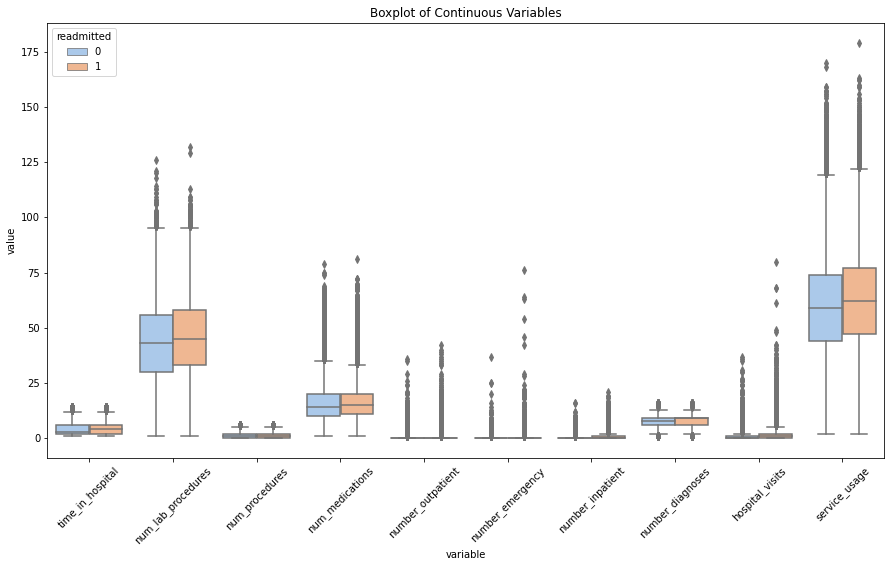

In [36]:
#We do not want to normalize here because we lose information
#We see that there is a significant difference between these populations
plt.figure(figsize=(15, 8))
sns.boxplot(x='variable', hue='readmitted', y='value', data= pd.melt(df, id_vars=['readmitted'], value_vars=cont_vars), palette='pastel')

plt.title('Boxplot of Continuous Variables')
plt.xticks(rotation=45)
plt.savefig('Figures/Continuous_variable_boxplot.png')

In [37]:
for x in cont_vars:
    print('Variable: {}'.format(x))
    display(df.groupby(['readmitted'])[x].describe().loc[:,['mean','std']])

Variable: time_in_hospital


,mean,std
readmitted,,
0,4.218371,2.930393
1,4.561856,3.003110


Variable: num_lab_procedures


,mean,std
readmitted,,
0,41.970983,19.691643
1,43.890567,19.510406


Variable: num_procedures


,mean,std
readmitted,,
0,1.402059,1.732051
1,1.261138,1.662338


Variable: num_medications


,mean,std
readmitted,,
0,15.579982,8.367649
1,16.432546,7.739460


Variable: number_outpatient


,mean,std
readmitted,,
0,0.273012,1.023710
1,0.484343,1.496792


Variable: number_emergency


,mean,std
readmitted,,
0,0.108989,0.528817
1,0.304993,1.249663


Variable: number_inpatient


,mean,std
readmitted,,
0,0.367415,0.837712
1,0.938632,1.563691


Variable: number_diagnoses


,mean,std
readmitted,,
0,7.196255,2.022109
1,7.665365,1.798860


Variable: hospital_visits


,mean,std
readmitted,,
0,0.749417,1.562016
1,1.727969,2.837771


Variable: service_usage


,mean,std
readmitted,,
0,58.953024,23.596921
1,61.584250,23.276543


In [38]:
print('These variables may invoke collinearity:', to_drop)

These variables may invoke collinearity: ['hospital_visits', 'service_usage', 'admission_source_id_5', 'diag_2_K', 'diag_3_K']


In [39]:
df.drop(to_drop, axis=1, inplace=True)

In [40]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,...,miglitol_1,troglitazone_1,tolazamide_1,insulin_1,glyburide-metformin_1,glipizide-metformin_1,glimepiride-pioglitazone_1,metformin-pioglitazone_1,change_1,diabetesMed_1
0,1,41,0,1,0,0,0,1,-99,-99,...,0,0,0,0,0,0,0,0,0,0
1,3,59,0,18,0,0,0,9,-99,-99,...,0,0,0,1,0,0,0,0,1,1
2,2,11,5,13,2,0,1,6,-99,-99,...,0,0,0,0,0,0,0,0,0,1
3,2,44,1,16,0,0,0,7,-99,-99,...,0,0,0,1,0,0,0,0,1,1
4,1,51,0,8,0,0,0,5,-99,-99,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,-99,2,...,0,0,0,1,0,0,0,0,1,1
101762,5,33,3,18,0,0,1,9,-99,-99,...,0,0,0,1,0,0,0,0,0,1
101763,1,53,0,9,1,0,0,13,-99,-99,...,0,0,0,1,0,0,0,0,1,1
101764,10,45,2,21,0,0,1,9,-99,-99,...,0,0,0,1,0,0,0,0,1,1


In [41]:
#Compare each column to target variable (Hypothesis testing)
#That means comparing from continuous to categorical (Logistic Regression) and
#categorical to categorical (chi-square test - Crammer's V)

def interpret_cramers(x): #Cramer's V correlation coefficient
    if 0 < x <= 0.1:
        return 'little to no association'
    elif 0.1 < x <= 0.3:
        return 'weak association'
    elif 0.3 < x <= 0.5:
        return 'moderate association'
    elif 0.5 < x:
        return 'strong association'
    else:
        return 'incorrect calculation'
    
def interpret_pbcc(x): #Pearson's Bivariate Correlation Coefficient
    x = abs(x)
    if 0 < x <= 0.2:
        return 'little to no association'
    elif 0.2 < x <= 0.4:
        return 'weak association'
    elif 0.4 < x <= 0.6:
        return 'moderate association'
    elif 0.6 < x <= 0.8:
        return 'strong association'
    elif 0.8 < x:
        return 'very strong association'
    else:
        return 'incorrect calculation'
                        

def chi_square_and_cramersv(df, col_1, col_2):
    """Chi-square test for categorical-categorical """
    table = pd.crosstab(index=df[col_1], columns=df[col_2])
    chi2 = chi2_contingency(table)
    """Calculate Cramérs V statistic for categorial-categorial association."""
    n = table.sum().sum()
    phi2 = chi2[0] / n
    cramersv = np.sqrt(phi2 / (min(table.shape)-1))
    return chi2[0], chi2[1], chi2[2], chi2[3], cramersv

alpha = 0.05


In [42]:
hypothesis_tests = []
for dummy_variable in df.columns:
    for variable in att_dtype:
        if variable in dummy_variable:
            y = variable
    if (att_dtype[y] == 'Categorical') | (att_dtype[y] == 'Ordinal'):
        #Chi-Squared Stats Test
        print('Chi-Squared Test with:', dummy_variable)
        stat, p, dof, expected, cramersv = chi_square_and_cramersv(df, 'readmitted', dummy_variable)
        
        # interpret p-value 
        if p <= alpha: #Dependent with target variable (reject H0) - A relationship exists - keep
            hypothesis_tests.append([dummy_variable, att_dtype[y], round(p, 3), 'Reject H0', 
                                     #round(cramersv, 3), interpret_cramers(cramersv)
                                    ])
            
        else: #Independent from target variable (fail to reject H0) - A relationship does not exist - remove
            hypothesis_tests.append([dummy_variable, att_dtype[y], round(p, 3), 'Fail to reject H0', 
                                     #round(cramersv, 3), interpret_cramers(cramersv)
                                    ])
        
    elif att_dtype[y] == 'Numerical':
        #T-test
        print('T-test with:', dummy_variable)
        #Parametric tests are valid for our purposes as our sample size is large enough
        #And is accurate enough for our needs https://www.bmj.com/content/338/bmj.a3166
        
        t_stat, p_val = ttest_ind(df[dummy_variable], df['readmitted'])
        
        #Point-biserial correlation
        corr, pbc_p = pointbiserialr(df[dummy_variable], df['readmitted'])
        if p_val <= alpha and abs(t_stat) > 0: #Dependent (reject H0)
            hypothesis_tests.append([dummy_variable, att_dtype[y], round(p_val, 3), 'Reject H0', 
                                     #corr, interpret_pbcc(corr)
                                    ])
        else: #Independent (fail to reject H0)
            hypothesis_tests.append([dummy_variable, att_dtype[y], round(p_val, 3), 'Fail to reject H0', 
                                     #corr, interpret_pbcc(corr)
                                    ])

    else:
        continue

T-test with: time_in_hospital
T-test with: num_lab_procedures
T-test with: num_procedures
T-test with: num_medications
T-test with: number_outpatient
T-test with: number_emergency
T-test with: number_inpatient
T-test with: number_diagnoses
Chi-Squared Test with: max_glu_serum
Chi-Squared Test with: A1Cresult
Chi-Squared Test with: readmitted
Chi-Squared Test with: Age
Chi-Squared Test with: race_Asian
Chi-Squared Test with: race_Caucasian
Chi-Squared Test with: race_Hispanic
Chi-Squared Test with: race_Other
Chi-Squared Test with: gender_1
Chi-Squared Test with: admission_type_id_2
Chi-Squared Test with: admission_type_id_3
Chi-Squared Test with: discharge_disposition_id_2
Chi-Squared Test with: discharge_disposition_id_3
Chi-Squared Test with: discharge_disposition_id_4
Chi-Squared Test with: discharge_disposition_id_5
Chi-Squared Test with: admission_source_id_2
Chi-Squared Test with: admission_source_id_3
Chi-Squared Test with: admission_source_id_4
Chi-Squared Test with: diag_1_A
C

In [43]:
h_tests = pd.DataFrame(hypothesis_tests, columns=['Variable', 'Type', 'p_value', 'Null Hypothesis'])
h_tests

,Variable,Type,p_value,Null Hypothesis
0,time_in_hospital,Numerical,0.00,Reject H0
1,num_lab_procedures,Numerical,0.00,Reject H0
2,num_procedures,Numerical,0.00,Reject H0
3,num_medications,Numerical,0.00,Reject H0
4,number_outpatient,Numerical,0.00,Reject H0
...,...,...,...,...
89,glipizide-metformin_1,Categorical,0.46,Fail to reject H0
90,glimepiride-pioglitazone_1,Categorical,0.96,Fail to reject H0
91,metformin-pioglitazone_1,Categorical,0.96,Fail to reject H0
92,change_1,Categorical,0.00,Reject H0


In [44]:
h_tests.loc[h_tests['Variable'] != 'readmitted'].sort_values('p_value', ascending= False)

,Variable,Type,p_value,Null Hypothesis
30,diag_1_E,Categorical,0.986,Fail to reject H0
43,diag_2_B,Categorical,0.976,Fail to reject H0
91,metformin-pioglitazone_1,Categorical,0.960,Fail to reject H0
90,glimepiride-pioglitazone_1,Categorical,0.960,Fail to reject H0
57,diag_3_A,Categorical,0.960,Fail to reject H0
...,...,...,...,...
29,diag_1_D,Categorical,0.000,Reject H0
28,diag_1_C,Categorical,0.000,Reject H0
27,diag_1_B,Categorical,0.000,Reject H0
24,admission_source_id_3,Categorical,0.000,Reject H0


In [45]:
h_tests.loc[h_tests['Null Hypothesis'] == 'Reject H0']

,Variable,Type,p_value,Null Hypothesis
0,time_in_hospital,Numerical,0.000,Reject H0
1,num_lab_procedures,Numerical,0.000,Reject H0
2,num_procedures,Numerical,0.000,Reject H0
3,num_medications,Numerical,0.000,Reject H0
4,number_outpatient,Numerical,0.000,Reject H0
...,...,...,...,...
82,rosiglitazone_1,Categorical,0.007,Reject H0
83,acarbose_1,Categorical,0.000,Reject H0
87,insulin_1,Categorical,0.000,Reject H0
92,change_1,Categorical,0.000,Reject H0


In [46]:
#Could also use PCA to reduce the number of features but did not opt to because...

h_tests.loc[(h_tests['Null Hypothesis'] == 'Reject H0') & (h_tests['Variable'] != 'readmitted')].sort_values('p_value', ascending= False)

,Variable,Type,p_value,Null Hypothesis
42,diag_2_A,Categorical,0.049,Reject H0
47,diag_2_F,Categorical,0.048,Reject H0
68,diag_3_M,Categorical,0.044,Reject H0
26,diag_1_A,Categorical,0.042,Reject H0
79,glyburide_1,Categorical,0.029,Reject H0
...,...,...,...,...
32,diag_1_G,Categorical,0.000,Reject H0
33,diag_1_H,Categorical,0.000,Reject H0
36,diag_1_K,Categorical,0.000,Reject H0
1,num_lab_procedures,Numerical,0.000,Reject H0


In [47]:
h_tests.loc[h_tests['Null Hypothesis'] == 'Fail to reject H0']

,Variable,Type,p_value,Null Hypothesis
25,admission_source_id_4,Categorical,0.749,Fail to reject H0
30,diag_1_E,Categorical,0.986,Fail to reject H0
34,diag_1_I,Categorical,0.164,Fail to reject H0
37,diag_1_L,Categorical,0.302,Fail to reject H0
43,diag_2_B,Categorical,0.976,Fail to reject H0
45,diag_2_D,Categorical,0.077,Fail to reject H0
50,diag_2_I,Categorical,0.247,Fail to reject H0
57,diag_3_A,Categorical,0.960,Fail to reject H0
58,diag_3_B,Categorical,0.508,Fail to reject H0
60,diag_3_D,Categorical,0.552,Fail to reject H0


In [48]:
to_drop = h_tests.loc[(h_tests['Null Hypothesis'] == 'Fail to reject H0') & (h_tests['Variable'] != 'readmitted')]['Variable']

In [49]:
df.drop(to_drop, axis=1, inplace=True)

In [50]:
df.to_csv('Data/preprocessed_diabetes.csv', index=False)